# 7. KNN(K-Nearest Neighbors) 알고리즘

In [2]:
!pip install dmba

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

import dmba

%matplotlib inline


## KNN분류기
* 모델 중심이 아닌 데이터 중심
* 데이터에 대한 가정을 하지 않음
* 간단한 아이디어: 레코드를 유사한 레코드로 분류

* 게으른 학습자(lazy learner)
    * 주어진 데이터에서 새로운 데이터에 대해 비슷한 데이터를 검색
    * 학습용 데이터 셋을 '학습'이 아닌 '검색(lookup)'용 테이블로 사용하여 입력변수들과 일치하는 레코드를 찾아 타겟변수를 예측
    * 유유상종의 원리: 비슷한 레코드들은 n차원의 공간에서 가까이 위치하며, 타겟변수의 클래스가 같음
        * '오리처럼 걸고, 오리처럼 꽥꽥거리고, 오리처럼 보인다면 아마도 오리일 것이다.'

> * 부지런한 학습자(eager learner)
>   * 주어진 데이터에 기초하여 $y=f(x)$와 같은 수학적 관계를 개발한 후 새로운 데이터에 대하여 결과를 예측
>   * 입력변수와 타겟변수 간의 실제 관계를 가장 잘 근사시키려 함

* 대표적인 게으른 학습자 기반 알고리즘
* 학습용 데이터셋 **전체를 '기억'**
* 레이블이 없는(클래스를 모르는) 레코드를 분류할 때 이 레코드의 입력변수들을 학습용 데이터 전체와 비교해서 가장 가까운 것을 탐색
* 가장 가까운 학습용 레코드의 클래스 레이블이 시험용 레코드의 예측하고자 하는 클래스 레이블
* 이것은 비모수적 방법으로, 일반화나 데이터셋의 분포를 찾으려는 시도를 하지 않음

---

## k-NN 분류기(범주형 결과)
1. 분류하고자 하는 새로운 레코드와 유사한 k개의 이웃 레코드를 식별
    * 새로운 레코드에 대한 예측변수들의 값을 X1, X2, ..., Xp로 표현한다고 할 때, k-NN알고리즘은 예측 변수의 공간에서 유사하거나 가까운 레코드, 즉 j에 근접한 값을 갖는 레코드들을 학습 데이터셋에서 찾음
2. 유사(이웃) 레코드를 사용해 새로운 레코드를 특정 클래스로 분류. 주로 이웃 레코드들 중 상당수가 속한 클래스로 배정
    * 이웃 레코드들이 속한 클래스들을 참조하여 분류하고자 하는 레코드에 클래스 할당
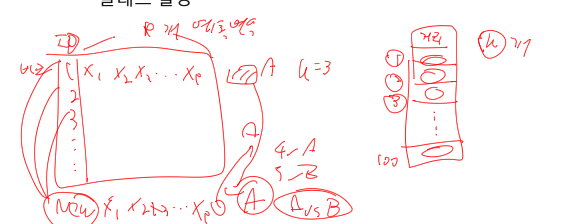

* k-NN 알고리즘
    * 소속 클래스(Y)와 예측 변수들 X1, X2, ..., Xp간의 관계에 대한 가정을 만들지 않는 분류 기법
    * 비모수적 방법: 선형 회귀 모델의 선형식과 같이 미리 가정된 함수 형태에 대한 **모수 추정을 포함하지 않음**. 대신 데이터셋의 레코드(레코드들의 예측변수 값들) 간의 **유사성으로부터 정보를 얻음**.
    * 중요 이슈는 예측 변수 값을 기반으로 레코드 간의 거리를 어떻게 측정하는가 하는 문제
* 이웃 결정하기:
    * 가장 보편적으로 사용되는 거리 측도는 **유클리드 거리**
$$\sqrt{(x_1-u_1)^2+(x_2-u_2)^2+...+(x_p-u-p)^2}$$
*
    * 대부분의 경우 예측변수들의 척도를 균등히게 하기 위해 유클리드 거리 계산에 앞서 **예측변수들을 표준화**
        * 새로운 레코드를 표준화할 때, *학습 데이터셋의 평균과 표준편차*를 사용하며, 이때 새로운 레코드는 계산에서 제외
        * 검증 데이터셋의 평균과 표준편차는 표준화에 사용하지 않음
> * $z-score:\frac{x-\bar{x}}{\sigma}$

## 분류 규칙
* 가장 단순한 경우는 k=1
* k>1의 이웃을 갖는 경우
    * 분류될 레코드와 가장 가까운 k개의 이웃을 찾는다.
    * 레코드를 분류하기 위해 다수결 결정 규칙을 사용한다. 즉, 레코드는 k개 이웃들의 다수가 속하는 클래스로 분류된다.
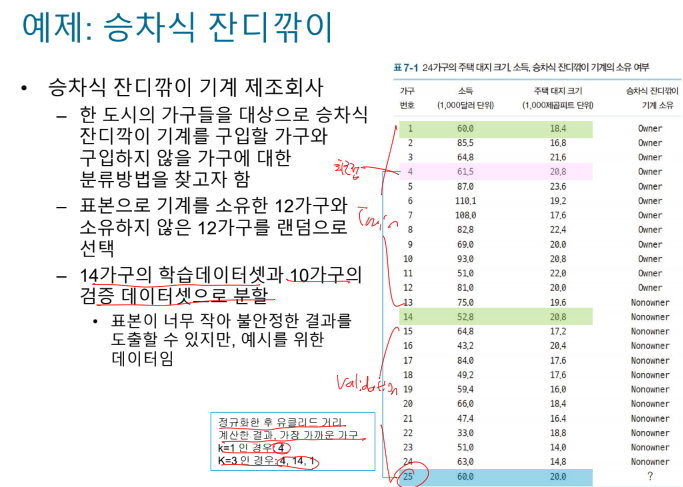

In [3]:
mower_df = dmba.load_data('RidingMowers.csv')
mower_df['Number'] = mower_df.index + 1
mower_df.head(9)

,Income,Lot_Size,Ownership,Number
0,60.0,18.4,Owner,1
1,85.5,16.8,Owner,2
2,64.8,21.6,Owner,3
3,61.5,20.8,Owner,4
4,87.0,23.6,Owner,5
5,110.1,19.2,Owner,6
6,108.0,17.6,Owner,7
7,82.8,22.4,Owner,8
8,69.0,20.0,Owner,9


In [4]:
trainData, validData = train_test_split(mower_df, test_size=0.4, random_state=26)
print(trainData.shape, validData.shape)

# new household
newHousehold = pd.DataFrame([{'Income': 60, 'Lot_Size': 20}])
newHousehold

(14, 4) (10, 4)


,Income,Lot_Size
0,60,20


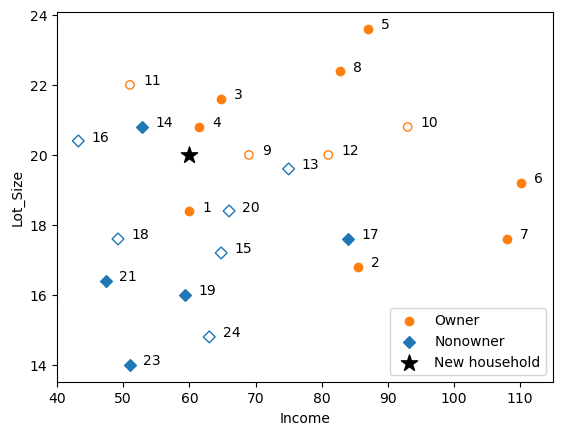

In [5]:
# scatter plot
def plotDataset(ax, data, showLabel=True, **kwargs):
    subset = data.loc[data['Ownership']=='Owner']
    ax.scatter(subset.Income, subset.Lot_Size, marker='o', label='Owner' if showLabel else None, color='C1', **kwargs)

    subset = data.loc[data['Ownership']=='Nonowner']
    ax.scatter(subset.Income, subset.Lot_Size, marker='D', label='Nonowner' if showLabel else None, color='C0', **kwargs)

    plt.xlabel('Income')  # set x-axis label
    plt.ylabel('Lot_Size')  # set y-axis label
    for _, row in data.iterrows():
        ax.annotate(row.Number, (row.Income + 2, row.Lot_Size))

fig, ax = plt.subplots()

plotDataset(ax, trainData)
plotDataset(ax, validData, showLabel=False, facecolors='none')

ax.scatter(newHousehold.Income, newHousehold.Lot_Size, marker='*', label='New household', color='black', s=150)

plt.xlabel('Income')  # set x-axis label
plt.ylabel('Lot_Size')  # set y-axis label

handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(40, 115)
ax.legend(handles, labels, loc=4)

plt.show()

In [6]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Income', 'Lot_Size']])  # Note the use of an array of column names

# Transform the full dataset
mowerNorm = pd.concat([pd.DataFrame(scaler.transform(mower_df[['Income', 'Lot_Size']]),
                                    columns=['zIncome', 'zLot_Size']),
                       mower_df[['Ownership', 'Number']]], axis=1)
trainNorm = mowerNorm.iloc[trainData.index]
validNorm = mowerNorm.iloc[validData.index]
newHouseholdNorm = pd.DataFrame(scaler.transform(newHousehold), columns=['zIncome', 'zLot_Size'])

In [7]:
knn = NearestNeighbors(n_neighbors=3)
knn.fit(trainNorm[['zIncome', 'zLot_Size']])
distances, indices = knn.kneighbors(newHouseholdNorm)
print(trainNorm.iloc[indices[0], :])  # indices is a list of lists, we are only interested in the first element

     zIncome  zLot_Size Ownership  Number
3  -0.409776   0.743358     Owner       4
13 -0.804953   0.743358  Nonowner      14
0  -0.477910  -0.174908     Owner       1


## k값 선택
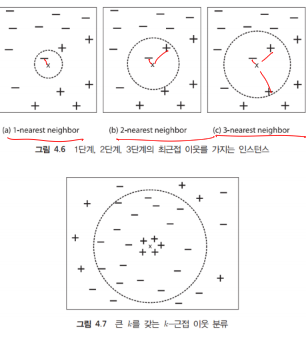

* k가 너무 작으면 데이터의 노이즈를 적합할 위험
* k가 너무 크면 이 알고리즘의 주된 장점 중 하나인 데이터의 지역적 구조를 파악할 수 있는 능력을 놓칠 수 있음
* 균형이 필요
    * 데이터가 복잡하고 불규칙한 구조일 수록 k의 최적값이 작아짐
    * 일반적으로 k값은 1\~20의 범위 내에서 결정됨
    * 클래스별로 같은 수가 나오는 경우를 피하기 위해서 홀수를 사용함

* k값을 어떻게 선택해야 할까?
    * 가장 분류 성능이 좋은 k를 선택
    * 학습 데이터셋을 사용해 검증 데이터셋의 레코드를 분류한 다음 다양한 값에 대해 오차율을 계산하여 선택. 가장 분류 성능이 좋은 k 선택

In [8]:
train_X = trainNorm[['zIncome', 'zLot_Size']]
train_y = trainNorm['Ownership']
valid_X = validNorm[['zIncome', 'zLot_Size']]
valid_y = validNorm['Ownership']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1       0.6
1    2       0.7
2    3       0.8
3    4       0.9
4    5       0.7
5    6       0.9
6    7       0.9
7    8       0.9
8    9       0.9
9   10       0.8
10  11       0.8
11  12       0.9
12  13       0.4
13  14       0.4



## 예제: 승차식 잔디깎이
* k가 선택되면 새로운 레코드를 분류하기 위해 학습. 데이터셋과 테스트 데이터셋을 합치고 알고리즘 반복

* 컷오프 값 설정
    * 다수결 원칙은 cut-ott=0.5
    * cut-off를 조정할 수 있음

In [9]:
# Retrain with full dataset
mower_X = mowerNorm[['zIncome', 'zLot_Size']]
mower_y = mowerNorm['Ownership']
knn = KNeighborsClassifier(n_neighbors=4).fit(mower_X, mower_y)
distances, indices = knn.kneighbors(newHouseholdNorm)
print(knn.predict(newHouseholdNorm))
print('Distances',distances)
print('Indices', indices)
print(mowerNorm.iloc[indices[0], :])

['Owner']
Distances [[0.31358009 0.40880312 0.44793643 0.61217726]]
Indices [[ 3  8 13  0]]
     zIncome  zLot_Size Ownership  Number
3  -0.409776   0.743358     Owner       4
8  -0.069107   0.437269     Owner       9
13 -0.804953   0.743358  Nonowner      14
0  -0.477910  -0.174908     Owner       1


## k-NN 예측기
* 연속형 변수를 예측하는 것으로도 쉽게 확장 가능
* 1. 거리를 계산해서 이웃을 결정
* 2. 클래스를 결정
    * 이를 위해, 최근접 이웃들의 평균 결과 값을 사용
    * 가중 평균값을 사용하기도 함
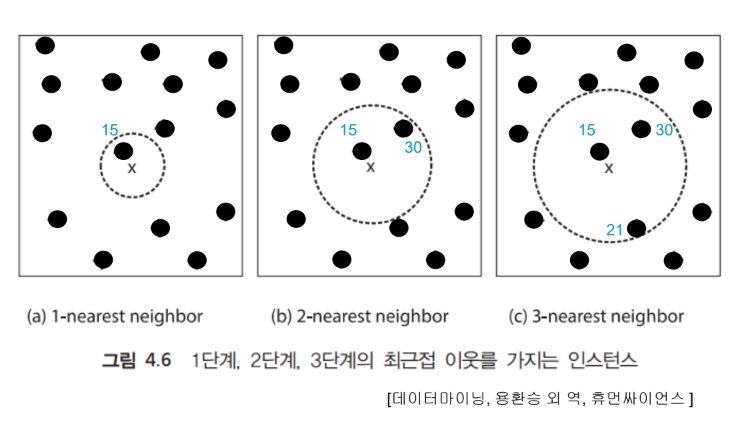

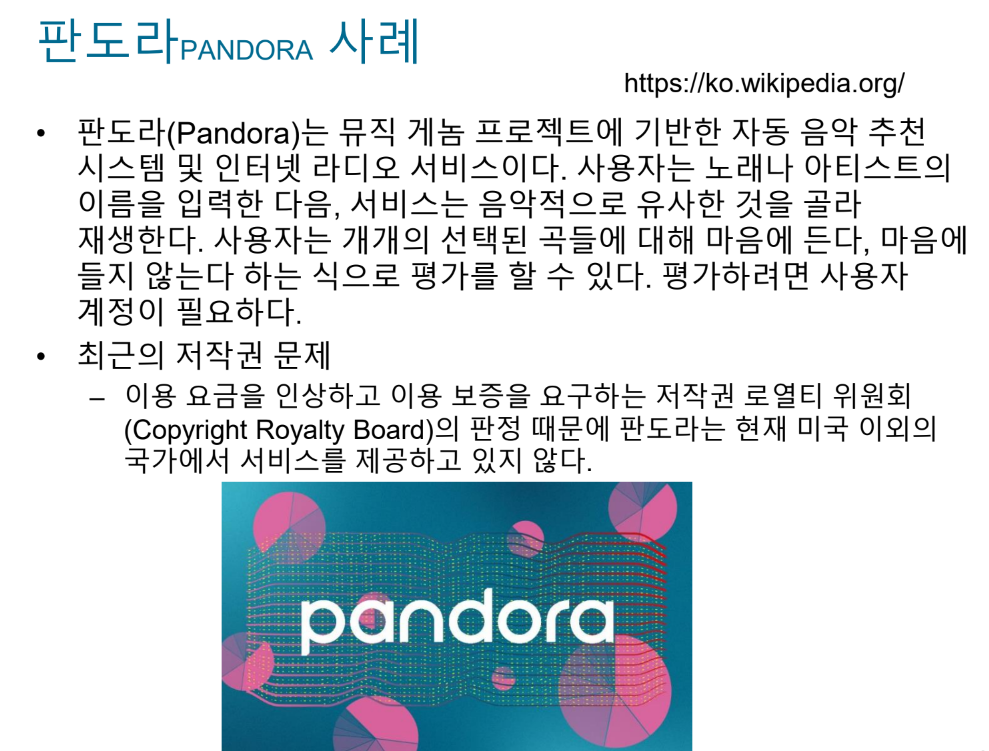

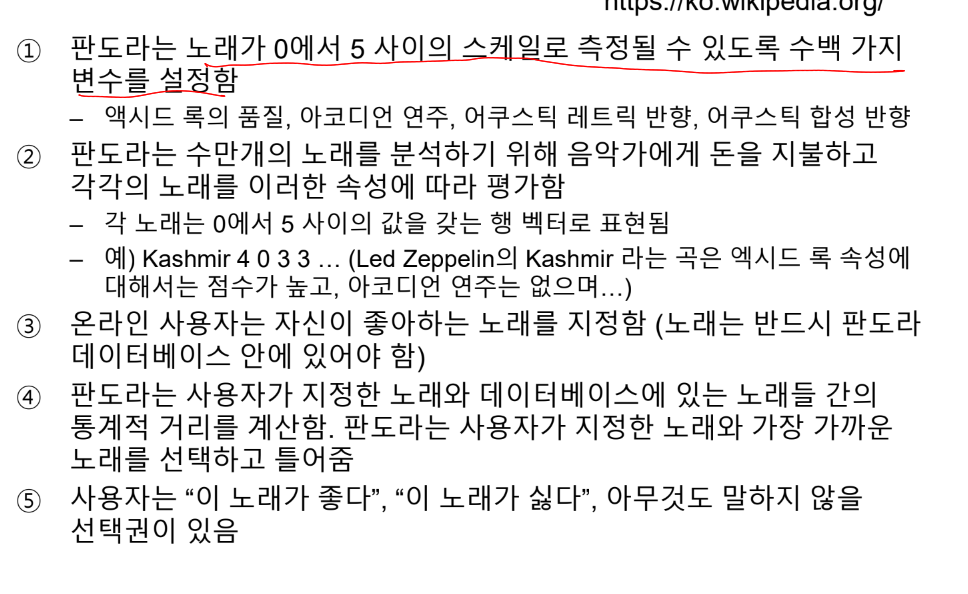

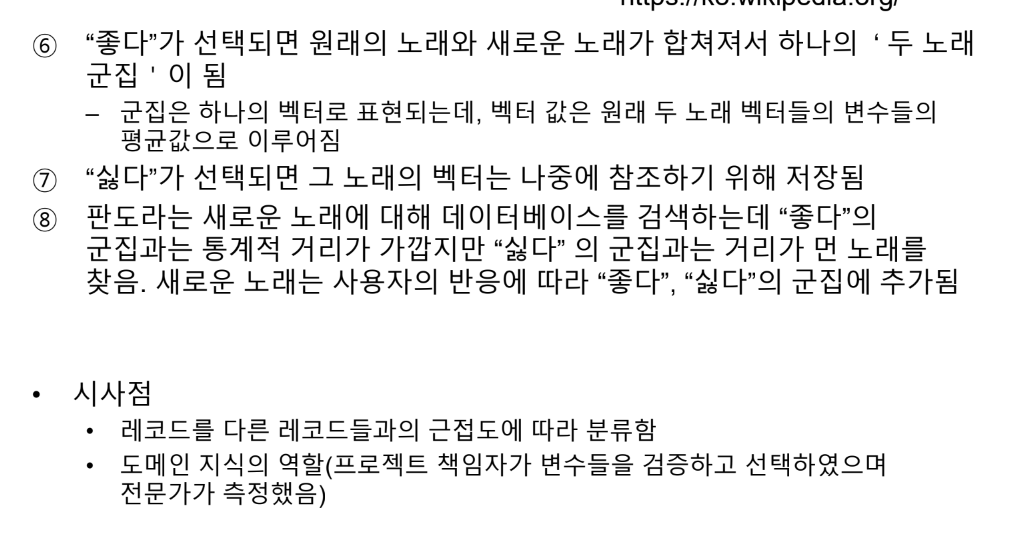

## k-NN알고리즘의 장단점
* 장점
    * 단순하다는 것과 모수에 대한 가정이 거의 없다.
    * 학습 데이터셋이 충분히 많을 때, 특히 각 클래스의 특성이 예측 변수 값들의 여러 조합으로 결정될 때 탁월한 성능

* 단점(활용 시 어려운 점)
    * 학습 데이터셋으로부터 모수를 추정하는 데 걸리는 시간은 없어도 학습 데이터셋이 클 경우에는 근접 이웃을 찾는 데 매우 많은 시간이 소요
        * 극복
            * 주성분 분석과 같은 차원 축소 방법으로 차원을 감소시킴으로써 거리 계산 시간을 줄인다.
            * 근접 이웃을 빨리 찾기 위해 검색 트리와 같은 정교한 자료구조를 사용한다.
    * 학습 데이터셋으로 필요한 레코드의 개수는 예측 변수의 개수 p가 증가함에 따라 기하급수적으로 증가
    * 많은 학습 시간이 소요되는 계산이 예측에 집중된 '나태 학습방법(lazy Learner)'
    